## **Setup & Load the Data**
---

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import pytz
from IPython.display import display
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

In [2]:
# Load a CSV file from your local file system
df = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/raw_analyst_ratings_cleaned.csv')
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


--- 
## **Text Analysis & Topic Modeling**
### **Common Keywords/Phrases:**

C:\Users\Admin\AppData\Local\Temp\ipykernel_15352\1372309259.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[kw for kw, _ in top_keywords], y=[score for _, score in top_keywords], palette='viridis')


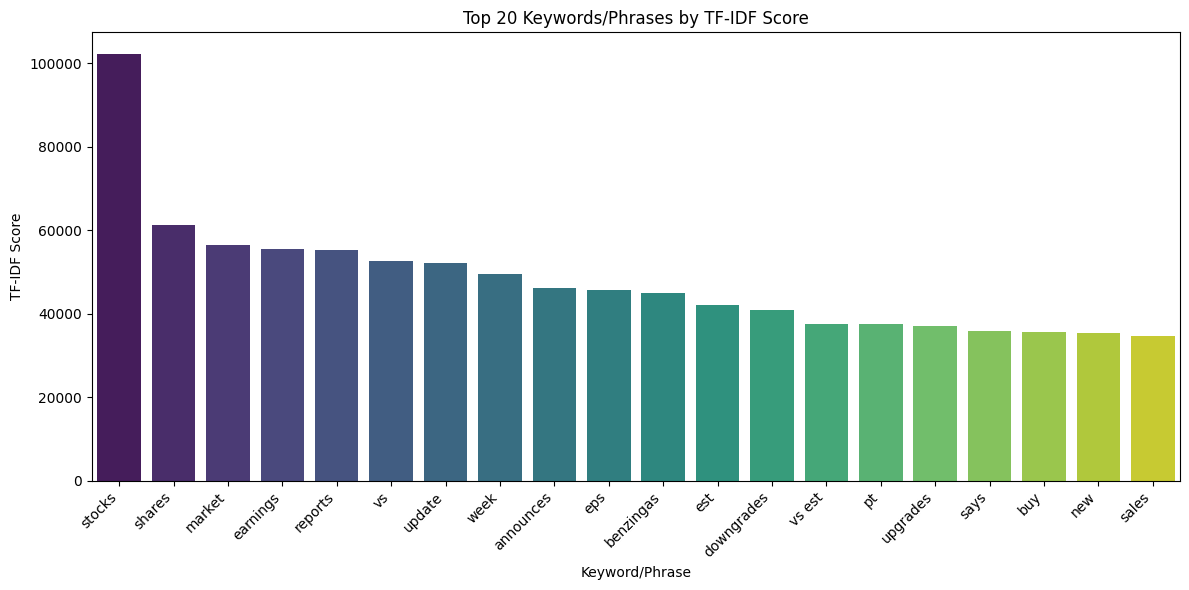

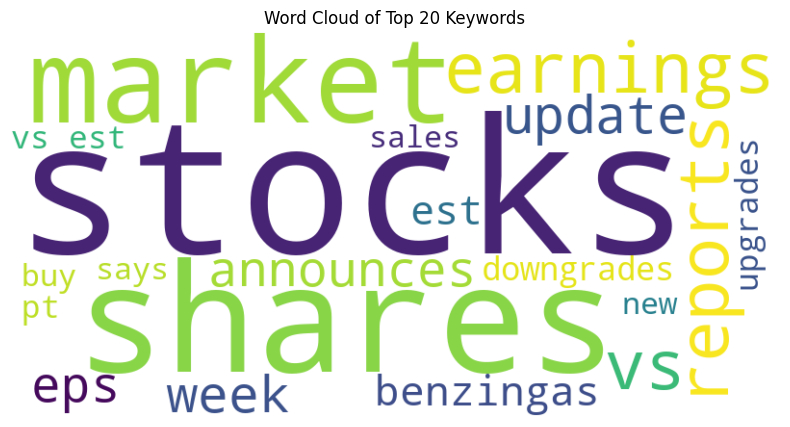

In [12]:
# Transform the cleaned headlines using the provided tfidf vectorizer
df['cleaned_headline'] = df['headline'].apply(lambda x: re.sub(r'[^a-zA-Z ]', '', str(x).lower()))
tfidf_matrix = tfidf.fit_transform(df['cleaned_headline'])

# Get feature names and sum TF-IDF scores
feature_names = tfidf.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_dict = dict(zip(feature_names, tfidf_scores))

# Get top 20 keywords/phrases
top_n = 20
top_keywords = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=[kw for kw, _ in top_keywords], y=[score for _, score in top_keywords], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Keywords/Phrases by TF-IDF Score')
plt.ylabel('TF-IDF Score')
plt.xlabel('Keyword/Phrase')
plt.tight_layout()
plt.show()

from wordcloud import WordCloud

# Prepare data for word cloud: convert top_keywords to dict
top_keywords_dict = dict(top_keywords)

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
wc.generate_from_frequencies(top_keywords_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 20 Keywords')
plt.show()


### **Summary of Top Keywords from Text Analysis**

- The text analysis identified the most significant keywords and phrases in analyst ratings headlines using TF-IDF scores.
- The top keywords include: **stocks, shares, market, earnings, reports, vs, update, week, announces, eps, benzingas, est, downgrades, vs est, pt, upgrades, says, buy, new, sales**.
- These keywords reflect frequent topics in financial news, such as stock performance, earnings reports, analyst actions (upgrades/downgrades), and market updates.
- Visualizations (bar plot and word cloud) highlight the prominence of these terms, indicating their importance in the dataset and providing insights into common themes in analyst ratings headlines.